In [50]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
flights = glob.glob('tmp/FLIGHTS/*.csv')
DEBS = glob.glob('tmp/DEBS/*.csv')
FBPosts = glob.glob('tmp/FBPosts/*.csv')

dirty_flights = []
clean_flights = []

dirty_DEBS = []
clean_DEBS = []

dirty_FBPosts = []
clean_FBPosts = []

for f in flights:
    if 'dirty' in f:
        dirty_flights.append(f)
    else:
        clean_flights.append(f)
        
for f in DEBS:
    if 'dirty' in f:
        dirty_DEBS.append(f)
    else:
        clean_DEBS.append(f)
        
for f in FBPosts:
    if 'dirty' in f:
        dirty_FBPosts.append(f)
    else:
        clean_FBPosts.append(f)

dirty_flights = sorted(dirty_flights)
clean_flights = sorted(clean_flights)

dirty_DEBS = sorted(dirty_DEBS)
clean_DEBS = sorted(clean_DEBS)

dirty_FBPosts = sorted(dirty_FBPosts)
clean_FBPosts = sorted(clean_FBPosts)

In [100]:
flights_clean_completeness_ratio_df = pd.DataFrame()
flights_clean_distinct_counts_df = pd.DataFrame()

for clean_flights_file in clean_flights:
    data = pd.read_csv(clean_flights_file)

    #get null_counts for all columns
    null_counts = data.isnull().sum()
    #get not null_counts for all columns
    not_null_counts = data.shape[0] - null_counts
    
    #get ratio
    ratio = null_counts/not_null_counts
    
    #add to df
    flights_clean_completeness_ratio_df[clean_flights_file] = ratio
    
    flights_clean_distinct_counts_df[clean_flights_file] = data.nunique()
    
flights_dirty_completeness_ratio_df = pd.DataFrame()
flights_dirty_distinct_counts_df = pd.DataFrame()

for dirty_flights_file in dirty_flights:
    data = pd.read_csv(dirty_flights_file)

    #get null_counts for all columns
    null_counts = data.isnull().sum()
    #get not null_counts for all columns
    not_null_counts = data.shape[0] - null_counts
    
    #get ratio
    ratio = null_counts/not_null_counts
    
    #add to df
    flights_dirty_completeness_ratio_df[dirty_flights_file] = ratio
    
    flights_dirty_distinct_counts_df[dirty_flights_file] = data.nunique()

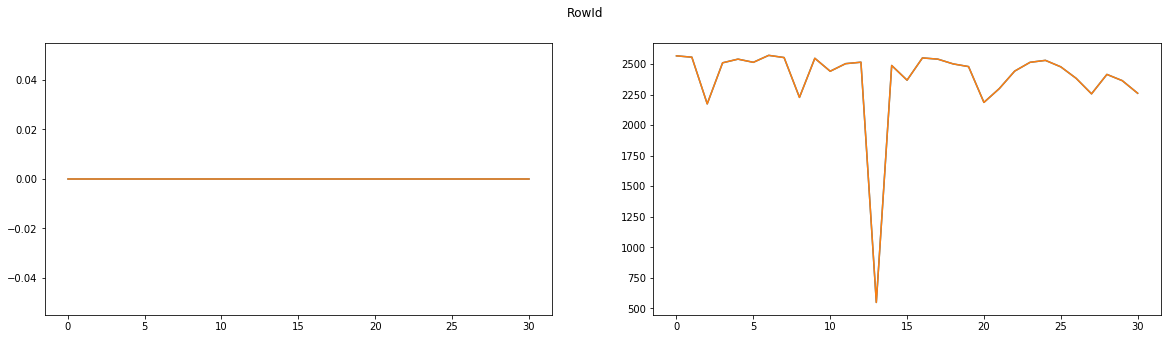

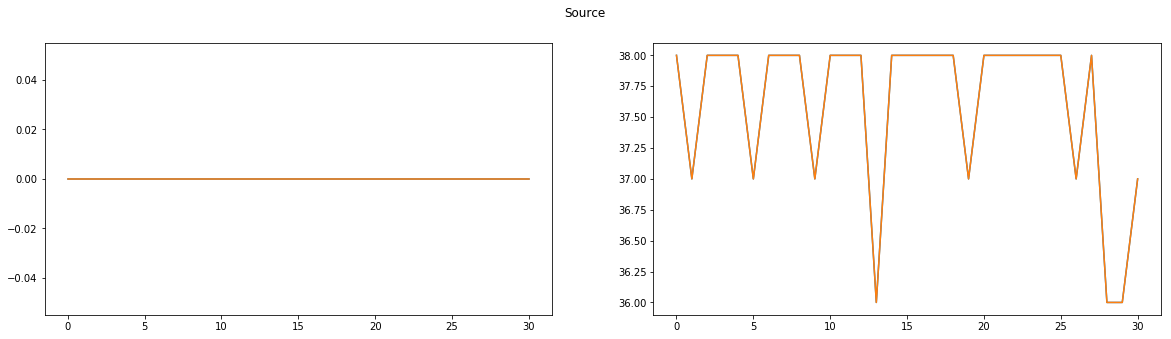

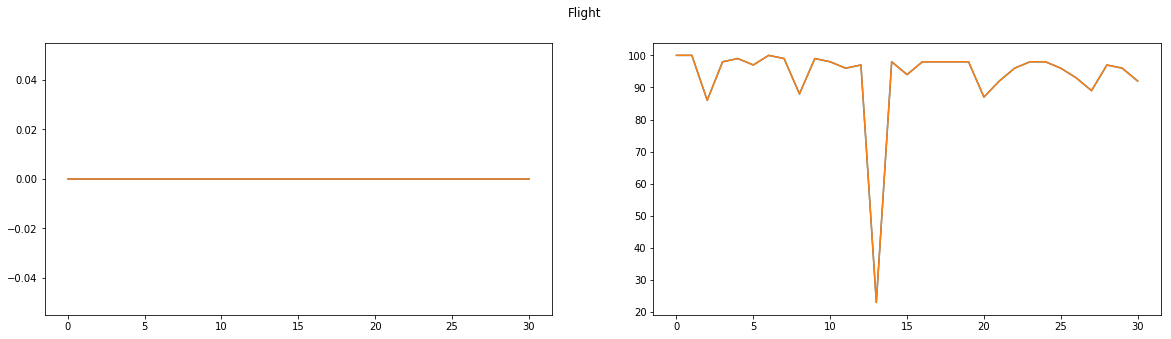

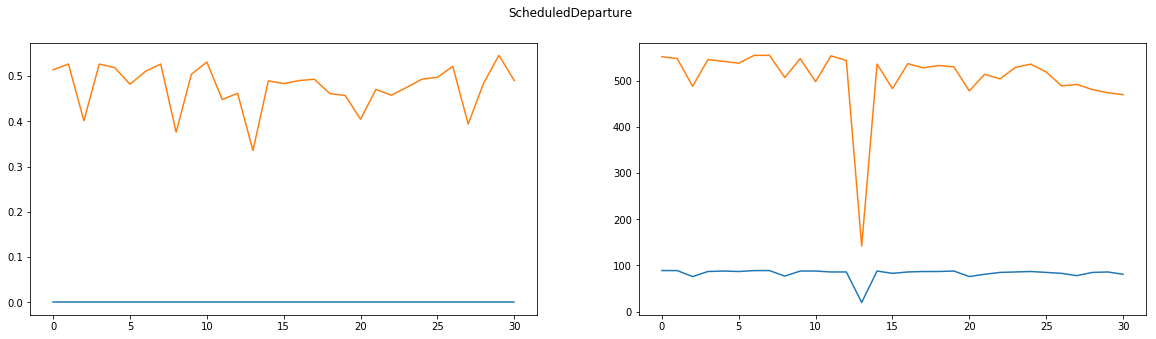

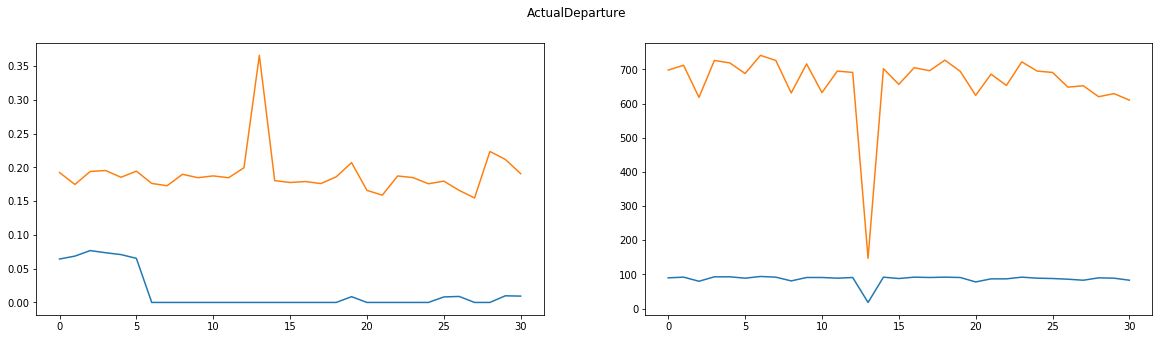

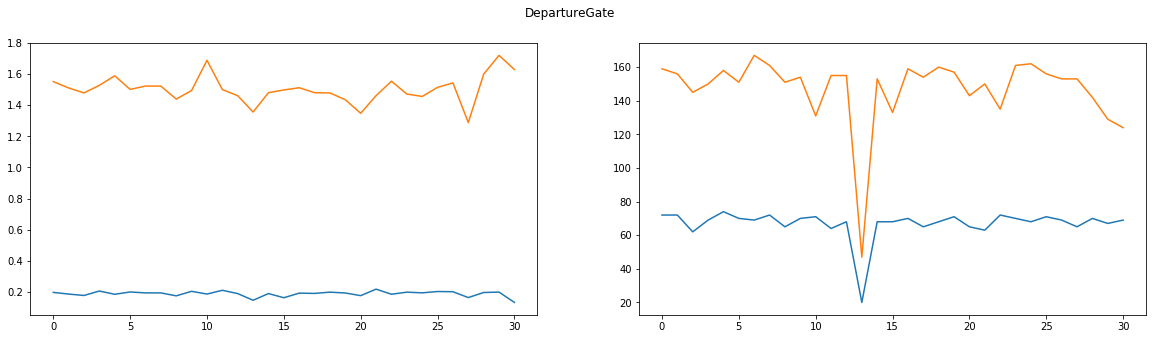

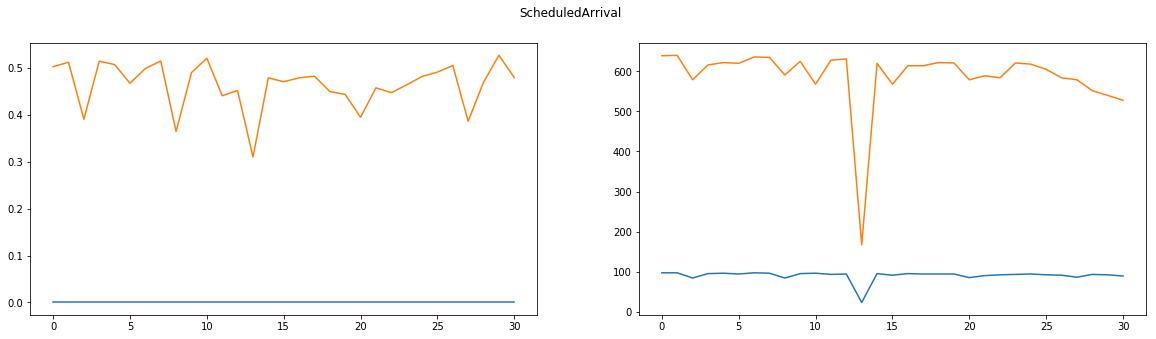

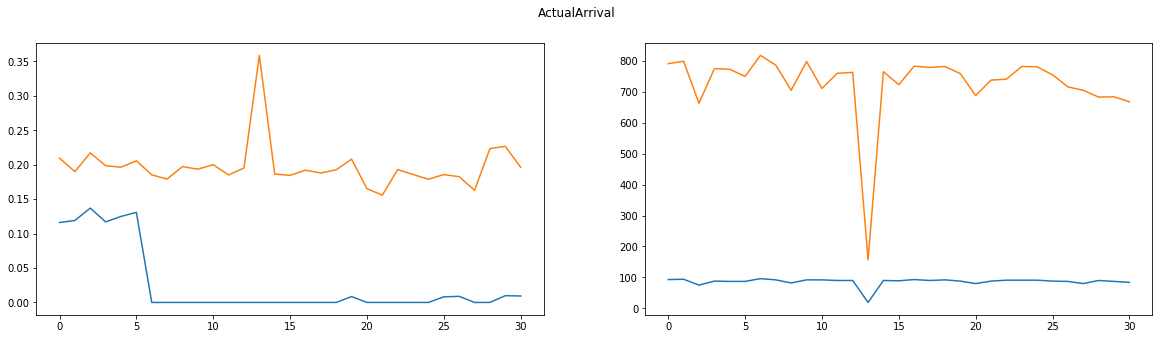

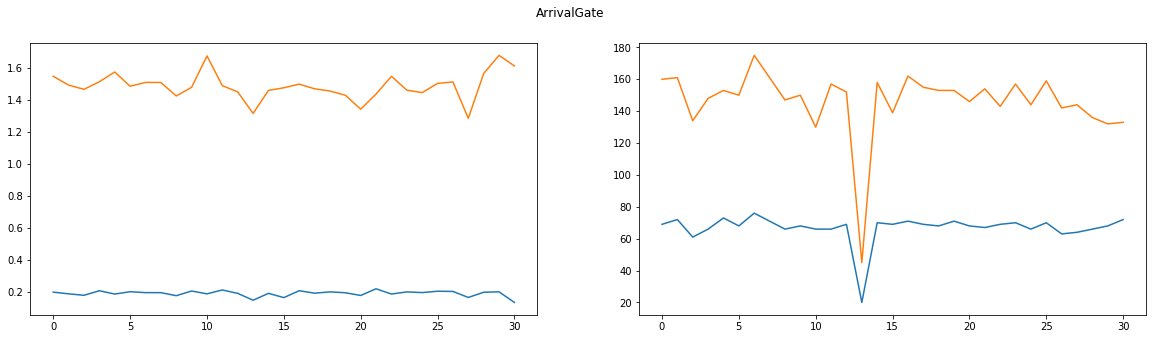

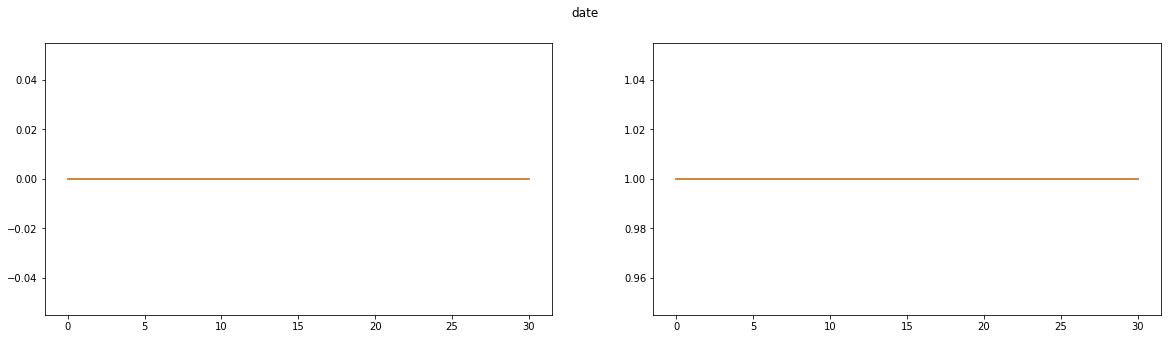

In [103]:
for column in flights_dirty_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle(column)
    ax1.plot(np.arange(flights_clean_completeness_ratio_df.shape[1]), flights_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(flights_dirty_completeness_ratio_df.shape[1]), flights_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(flights_clean_distinct_counts_df.shape[1]), flights_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(flights_dirty_distinct_counts_df.shape[1]), flights_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
#     plt.legend()
    plt.show()

In [104]:
DEBS_clean_completeness_ratio_df = pd.DataFrame()
DEBS_clean_distinct_counts_df = pd.DataFrame()

for clean_DEBS_file in clean_DEBS:
    data = pd.read_csv(clean_DEBS_file)

    #get null_counts for all columns
    null_counts = data.isnull().sum()
    #get not null_counts for all columns
    not_null_counts = data.shape[0] - null_counts
    
    #get ratio
    ratio = null_counts/not_null_counts
    
    #add to df
    DEBS_clean_completeness_ratio_df[clean_DEBS_file] = ratio
    
    DEBS_clean_distinct_counts_df[clean_DEBS_file] = data.nunique()
    
DEBS_dirty_completeness_ratio_df = pd.DataFrame()
DEBS_dirty_distinct_counts_df = pd.DataFrame()

for dirty_DEBS_file in dirty_DEBS:
    data = pd.read_csv(dirty_DEBS_file)

    #get null_counts for all columns
    null_counts = data.isnull().sum()
    #get not null_counts for all columns
    not_null_counts = data.shape[0] - null_counts
    
    #get ratio
    ratio = null_counts/not_null_counts
    
    #add to df
    DEBS_dirty_completeness_ratio_df[dirty_DEBS_file] = ratio
    
    DEBS_dirty_distinct_counts_df[dirty_DEBS_file] = data.nunique()

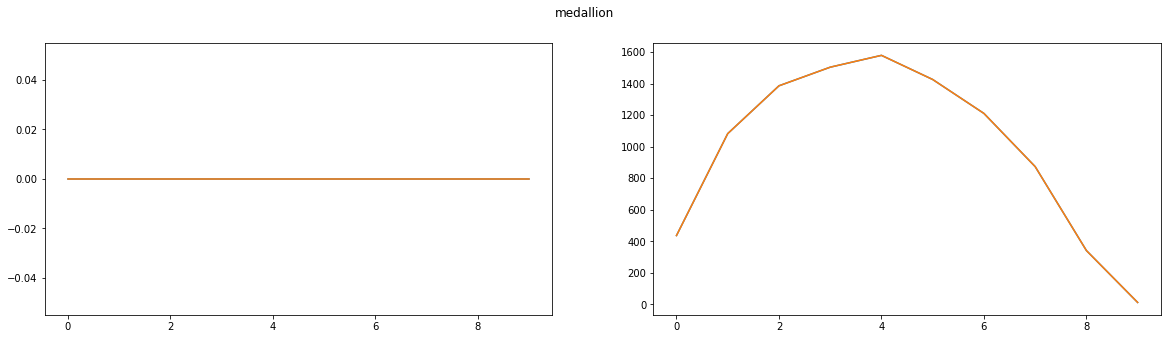

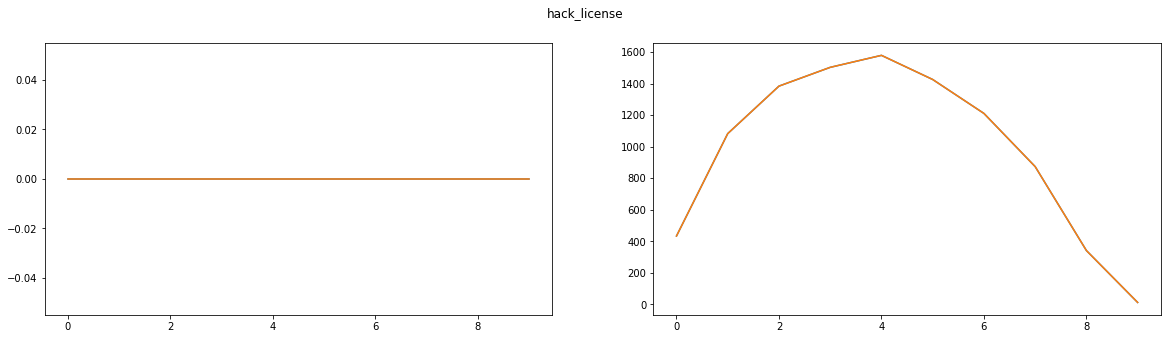

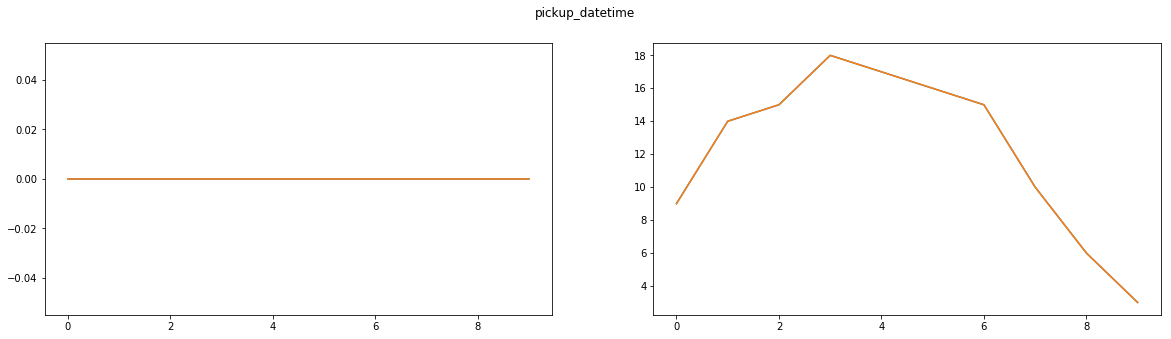

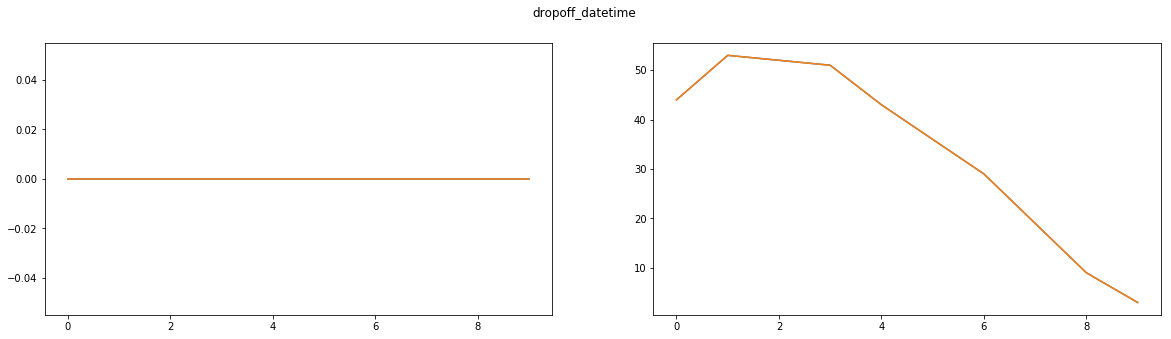

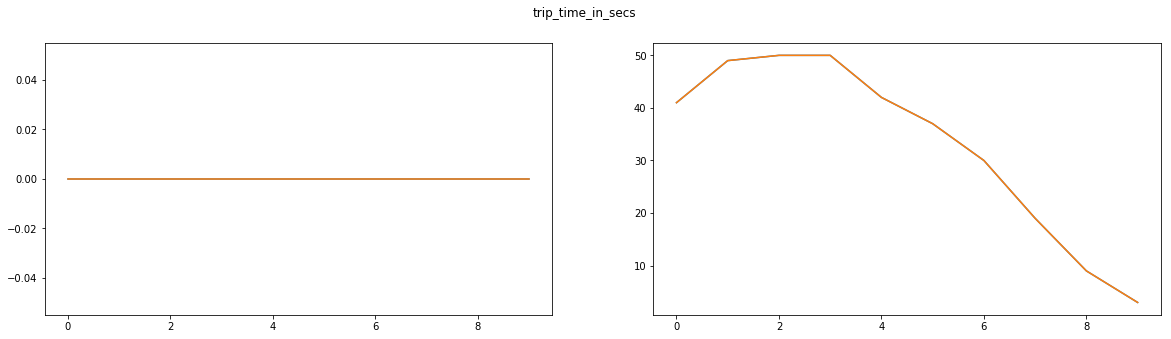

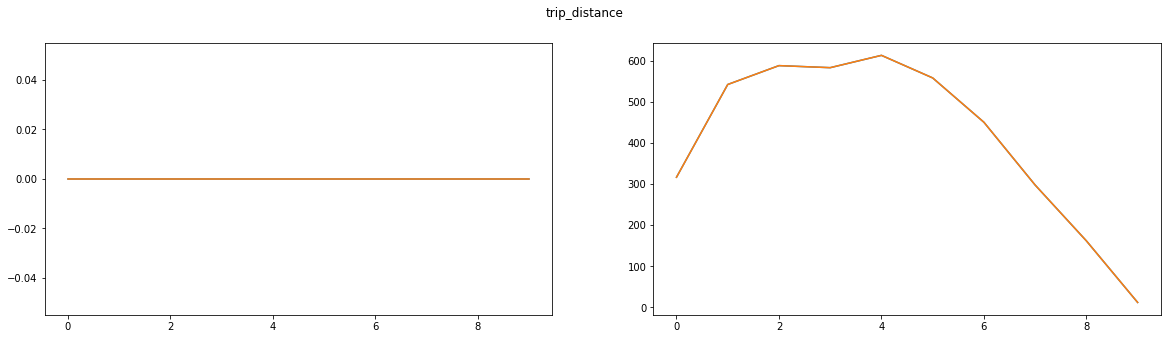

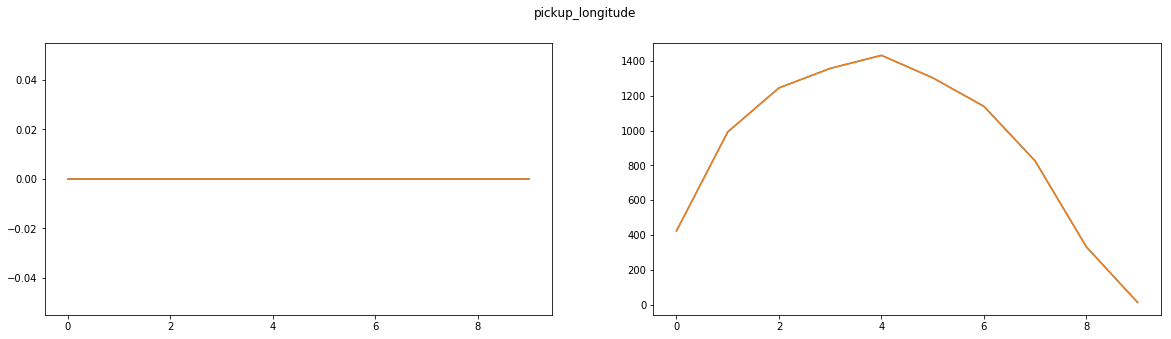

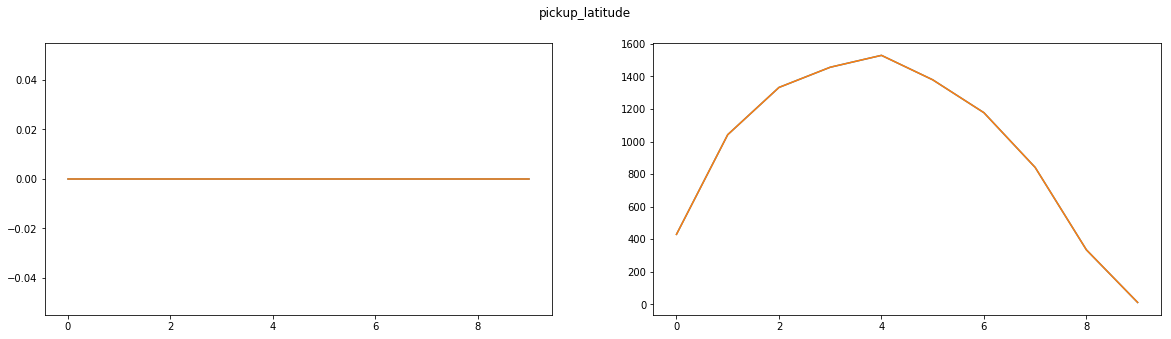

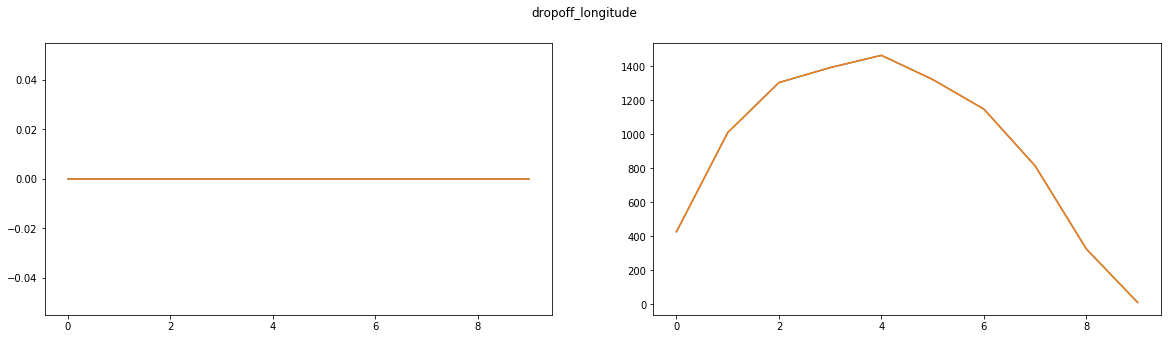

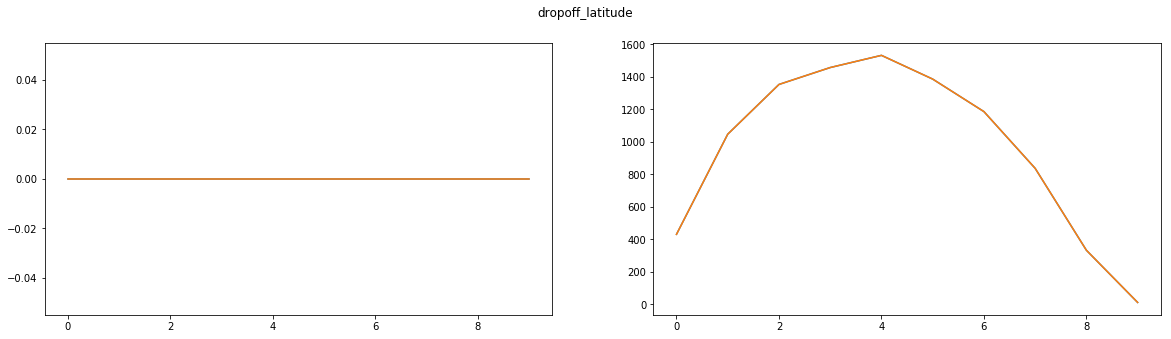

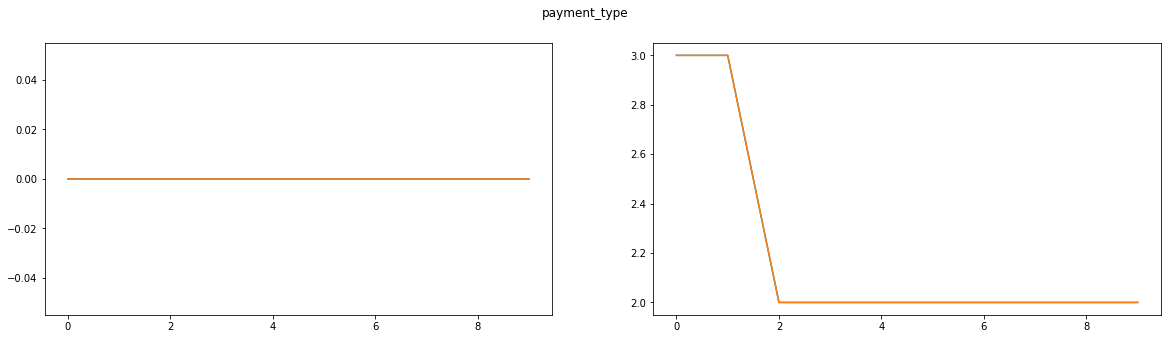

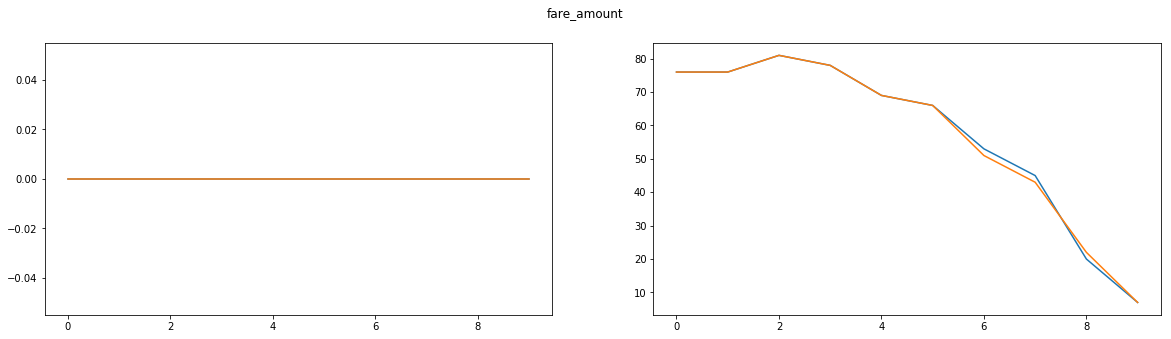

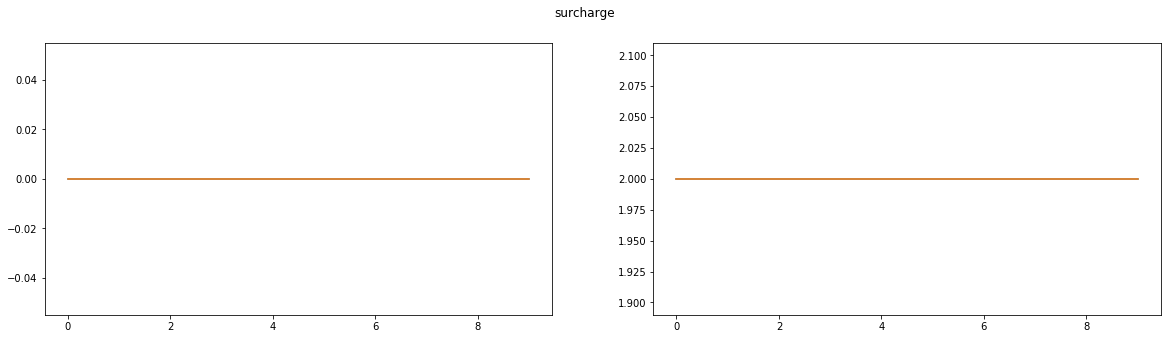

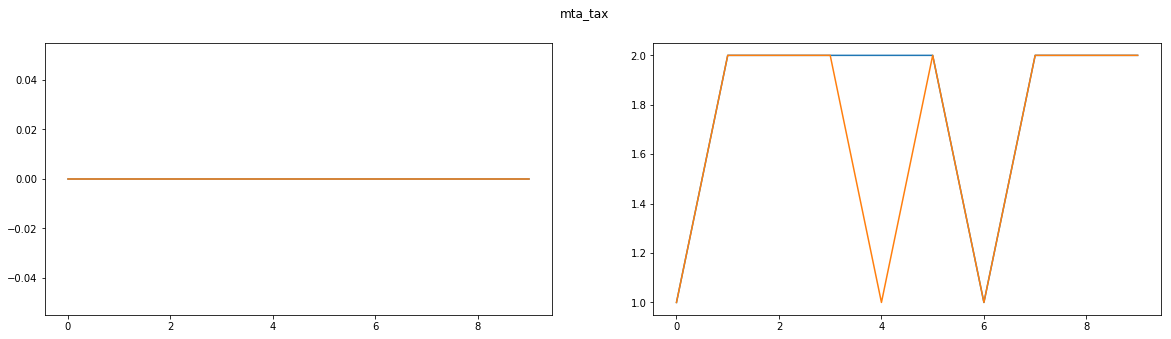

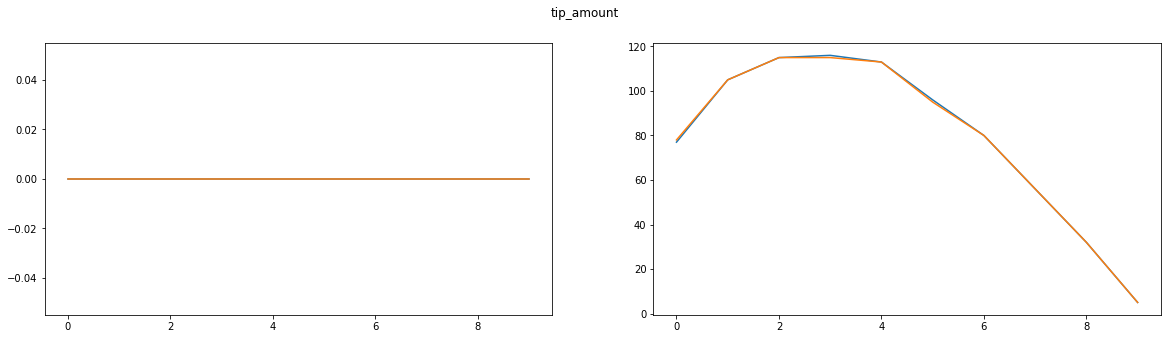

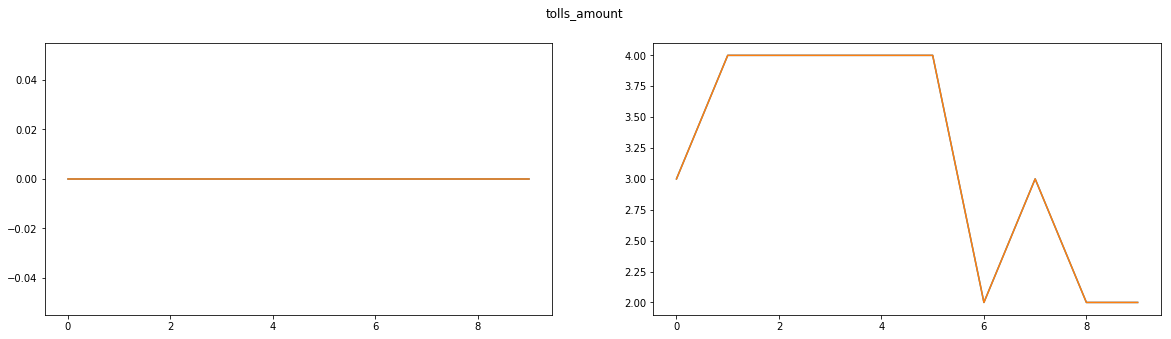

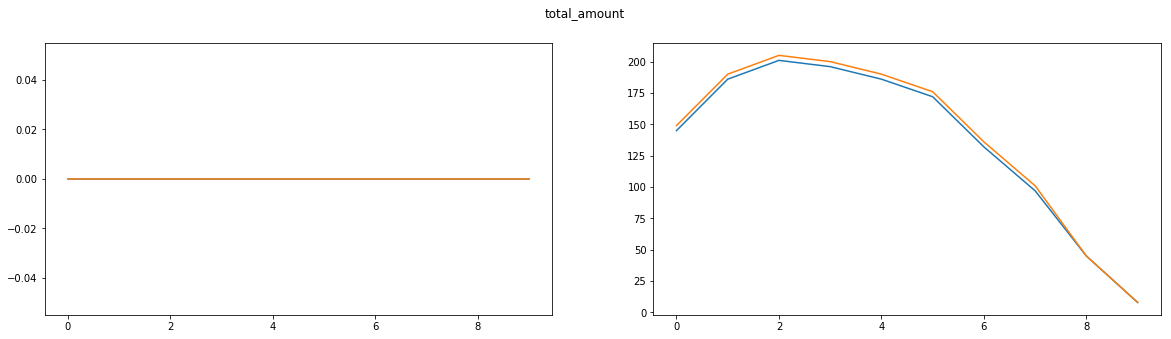

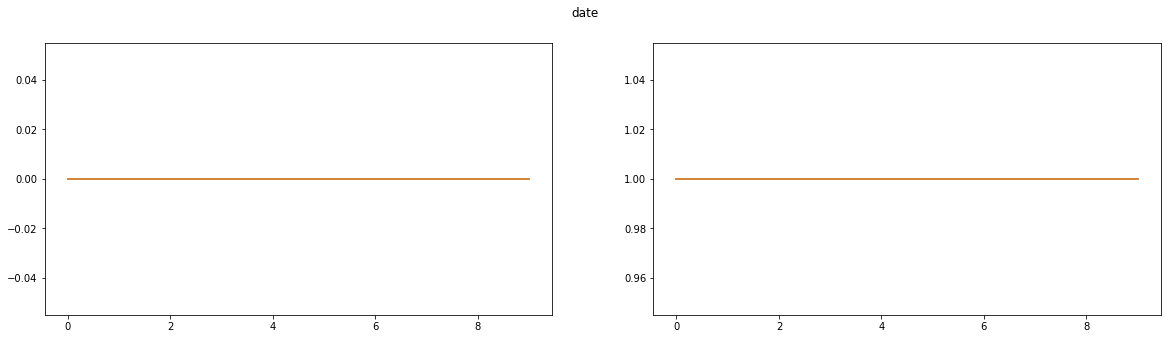

In [106]:
for column in DEBS_clean_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle(column)
    ax1.plot(np.arange(DEBS_clean_completeness_ratio_df.shape[1]), DEBS_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(DEBS_dirty_completeness_ratio_df.shape[1]), DEBS_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(DEBS_clean_distinct_counts_df.shape[1]), DEBS_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(DEBS_dirty_distinct_counts_df.shape[1]), DEBS_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
#     plt.legend()
    plt.show()